In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast
from collections import Counter

In [27]:
df = pd.read_csv('./classes.csv')

/var/folders/cj/11t2hzc55gjfmkwfwth0lkcc0000gn/T/ipykernel_48705/1475876956.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.index, y=genre_counts.values, palette="viridis")


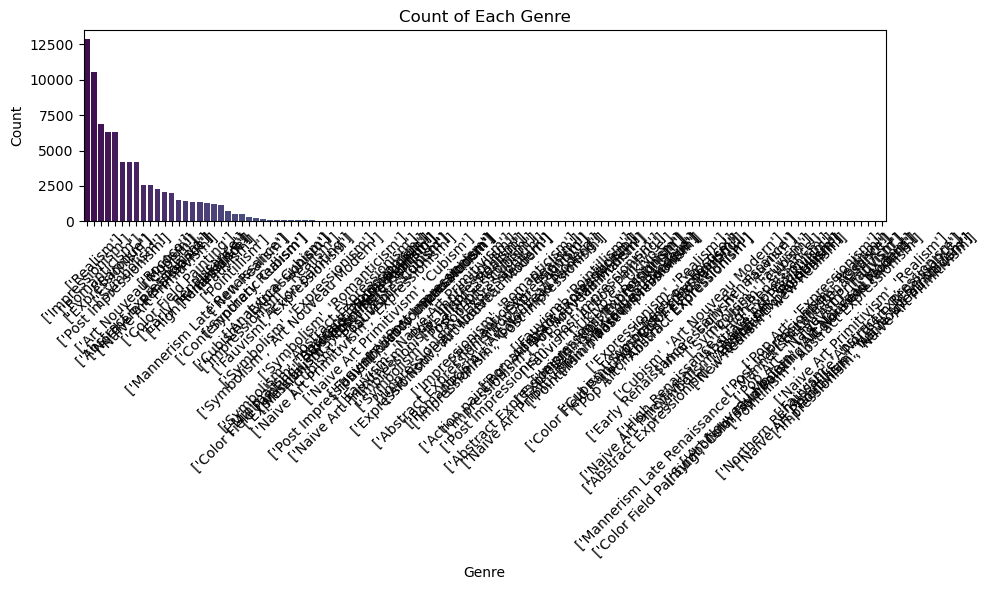

In [23]:
plt.figure(figsize=(10, 6))
genre_counts = df['genre'].value_counts()
sns.barplot(x=genre_counts.index, y=genre_counts.values, palette="viridis")
plt.title('Count of Each Genre')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

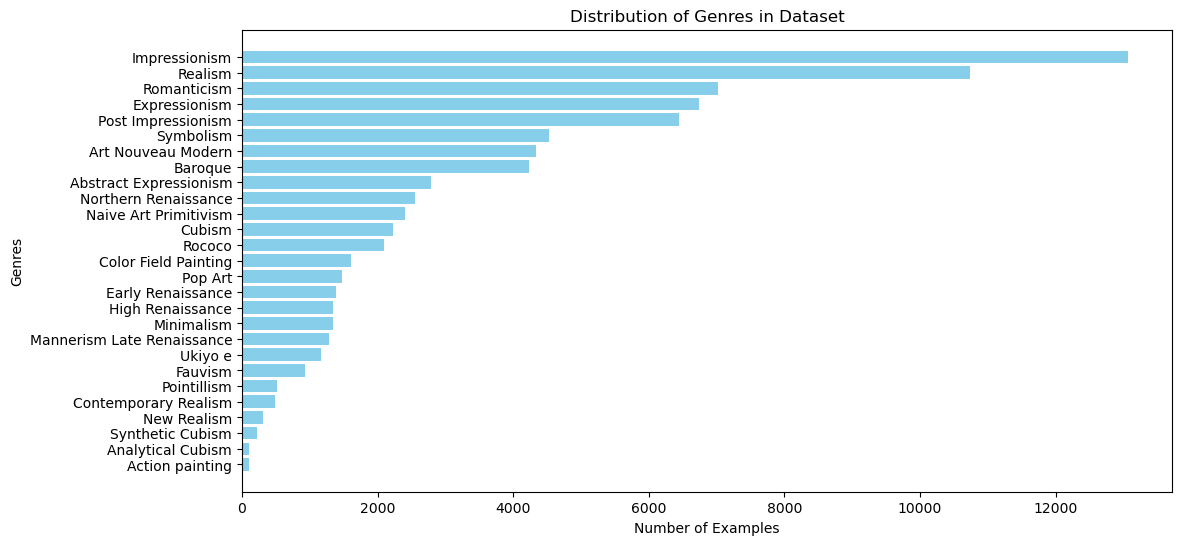

In [24]:
df['genre'] = df['genre'].apply(ast.literal_eval)
genre_counts = Counter([g for sublist in df['genre'] for g in sublist])
# Extract genres and counts from the Counter
genres, counts = zip(*genre_counts.most_common())  

plt.figure(figsize=(12, 6))
plt.barh(genres, counts, color='skyblue')
plt.xlabel("Number of Examples")
plt.ylabel("Genres")
plt.title("Distribution of Genres in Dataset")
plt.gca().invert_yaxis()  # Highest count on top
plt.show()

/var/folders/cj/11t2hzc55gjfmkwfwth0lkcc0000gn/T/ipykernel_48705/3474235183.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=artist_counts.index, y=artist_counts.values, palette="magma")


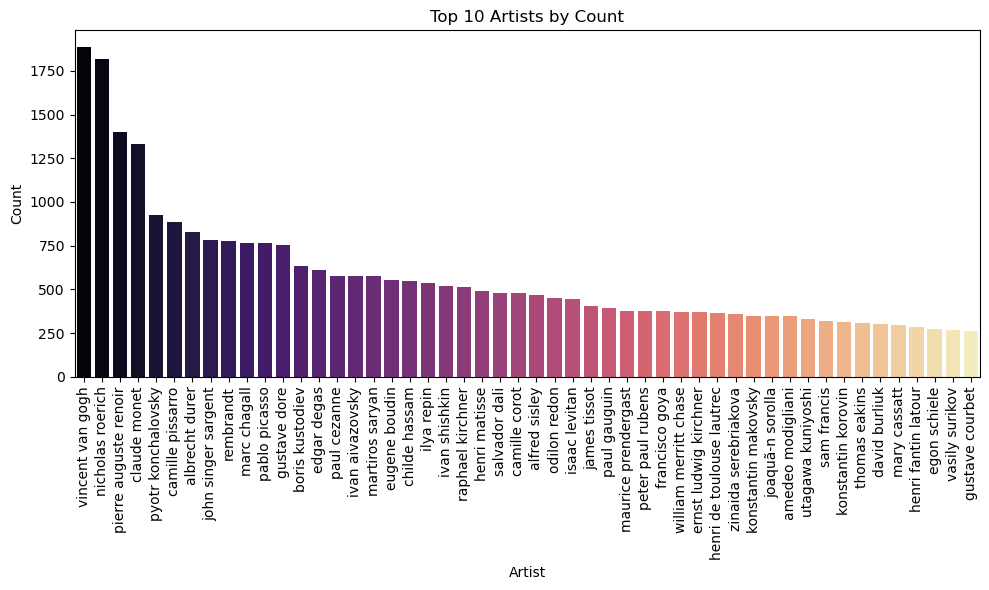

In [25]:
plt.figure(figsize=(10, 6))
artist_counts = df['artist'].value_counts().head(50)
sns.barplot(x=artist_counts.index, y=artist_counts.values, palette="magma")
plt.title('Top 10 Artists by Count')
plt.xlabel('Artist')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


Artist-Genre Crosstab:
genre                  ['Abstract Expressionism', 'Abstract Expressionism']  \
artist                                                                        
a.y. jackson                                                           0      
aaron siskind                                                          0      
abdullah suriosubroto                                                  0      
abidin dino                                                            0      
abraham manievich                                                      0      

genre                  ['Abstract Expressionism', 'Expressionism']  \
artist                                                               
a.y. jackson                                                     0   
aaron siskind                                                    0   
abdullah suriosubroto                                            0   
abidin dino                                                      0   
ab

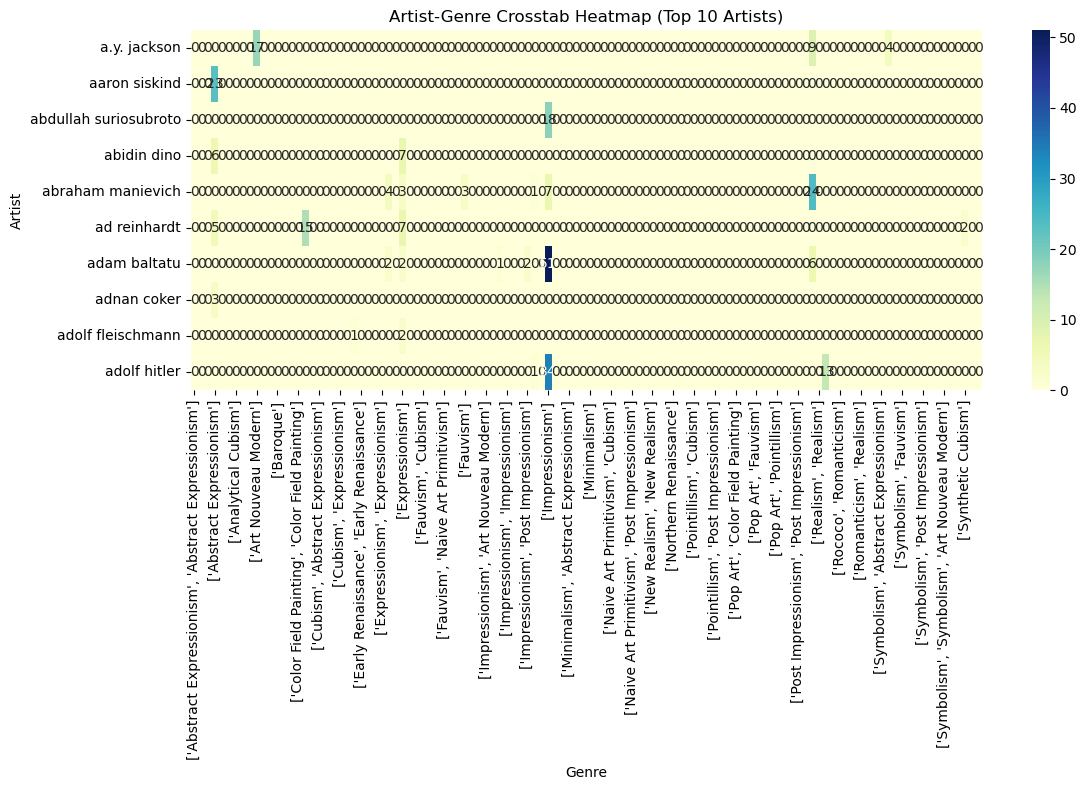

In [28]:
# 3. Cross-tabulation: Genre count per Artist (optional)
# This creates a pivot table to see the distribution of genres across artists
artist_genre = pd.crosstab(df['artist'], df['genre'])
print("\nArtist-Genre Crosstab:")
print(artist_genre.head())

# Heatmap for the crosstab (for a subset of artists for clarity)
plt.figure(figsize=(12, 8))
subset = artist_genre.head(10)  # display only first 10 artists for clarity
sns.heatmap(subset, annot=True, fmt="d", cmap="YlGnBu")
plt.title('Artist-Genre Crosstab Heatmap (Top 10 Artists)')
plt.xlabel('Genre')
plt.ylabel('Artist')
plt.tight_layout()
plt.show()